In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#datos 2019 arriba
datos= pd.read_csv("Emergencias_UNGRD.csv")
datos.head()

,FECHA,DEPARTAMENTO,MUNICIPIO,EVENTO,DIVIPOLA,FALLECIDOS,HERIDOS,DESAPARECIDOS,PERSONAS,FAMILIAS,...,VALOR BIG BAG,CANTIDAD CEMENTO,VALOR CEMENTO,CANTIDAD TEJAS DE ZINC,VALOR TEJAS DE ZINC,CANTIDAD TEJAS DE FIBROCEMENTO,VALOR TEJAS DE FIBROCEMENTO,DESCRIPCION MATERIALES DE CONSTRUCCION,VALOR MATERIALES DE CONSTRUCCION,VALOR TOTAL APOYO DEL FNGRD
0,01/01/2019 12:00:00 AM,ANTIOQUIA,SAN JERONIMO,INCENDIO ESTRUCTURAL,5656,0,0,0,5,1,...,$ - 0,0,$ - 0,0,$ - 0,0,$ - 0,No registra,$ - 0,$ - 0
1,01/01/2019 12:00:00 AM,RISARALDA,MARSELLA,INMERSION,66440,1,0,0,1,0,...,$ - 0,0,$ - 0,0,$ - 0,0,$ - 0,No registra,$ - 0,$ - 0
2,01/01/2019 12:00:00 AM,ANTIOQUIA,ANZA,INCENDIO DE COBERTURA VEGETAL,5044,0,0,0,0,0,...,$ - 0,0,$ - 0,0,$ - 0,0,$ - 0,No registra,$ - 0,$ - 0
3,01/01/2019 12:00:00 AM,ANTIOQUIA,MONTEBELLO,INCENDIO DE COBERTURA VEGETAL,5467,0,0,0,0,0,...,$ - 0,0,$ - 0,0,$ - 0,0,$ - 0,No registra,$ - 0,$ - 0
4,01/01/2019 12:00:00 AM,ANTIOQUIA,CAUCASIA,INCENDIO ESTRUCTURAL,5154,0,1,0,1,1,...,$ - 0,0,$ - 0,0,$ - 0,0,$ - 0,No registra,$ - 0,$ - 0


In [ ]:
datos.columns
datosValores=datos.drop(datos.columns[9:], axis=1)
datosValores.size

109728

In [ ]:
datosValores=datosValores.rename(columns={"EVENTO":"TIPO DE EVENTO", "PERSONAS":"AFECTADOS"})
datosValores["TIPO DE EVENTO"].unique()

array(['INCENDIO ESTRUCTURAL', 'INMERSION',
       'INCENDIO DE COBERTURA VEGETAL', 'COLAPSO ESTRUCTURAL',
       'MOVIMIENTO EN MASA', 'ACCIDENTE MINERO',
       'ACCIDENTE TRANSPORTE TERRESTRE', 'GRANIZADA',
       'ACCIDENTE TRANSPORTE MARITIMO O FLUVIAL', 'VENDAVAL',
       'INUNDACION', 'OTROS', 'EROSION', 'EXPLOSION',
       'AGLOMERACIÓN DE PÚBLICO', 'ACTIVACIÓN VOLCANICA', 'FUGA',
       'ACCIDENTE TECNOLOGICO', 'AVENIDA TORRENCIAL', 'DERRAME',
       'INCENDIO', 'SEQUIA', 'ACCIDENTE TRANSPORTE AEREO',
       'TORMENTA ELECTRICA', 'EVENTO MAYOR', 'SISMO', 'ACCIDENTE AÉREO',
       'TEMPORAL', 'FALLA ESTRUCTURAL', 'CASO FORTUITO',
       'CRECIENTE SUBITA', 'ACCIDENTE', 'EROSION COSTERA', 'IMERSION',
       'INUNDACIÓN', 'ACCIDENTE TRANSPORTE AÉREO', 'HELADA', 'CONATO',
       'COLAPSO', 'DIAPIRISMO', 'INCENDIO VEHICULAR', 'COVID-19',
       'INUNDACIoN', 'CICLON TROPICAL: DEPRESION/TORMENTA/HURACAN',
       'INMERSIoN', 'QUEMA', 'LLUVIAS', 'ONDA TROPICAL',
       'ACCIDENTE TRA

In [ ]:
#datos2018
dataset2018=pd.read_csv("Emergencias_2018_-_UNGRD.csv")
dataset2018.columns
dataset2018.head()
dataset2018Valores=dataset2018.drop(dataset2018.columns[9:], axis=1)
dataset2018Valores.size
dataset2018Valores.head()



,FECHA,DEPARTAMENTO,MUNICIPIO,TIPO DE EVENTO,DIVIPOLA,FALLECIDOS,HERIDOS,DESAPARECIDOS,AFECTADOS
0,01/01/2018 12:00:00 AM,BOYACA,GUATEQUE,INCENDIO FORESTAL,15322.0,0,0,0,0
1,01/01/2018 12:00:00 AM,CUNDINAMARCA,GUASCA,DESLIZAMIENTO,25322.0,0,0,0,0
2,01/01/2018 12:00:00 AM,QUINDIO,MONTENEGRO,DESLIZAMIENTO,63470.0,0,1,0,1
3,01/02/2018 12:00:00 AM,ANTIOQUIA,ANORI,DESLIZAMIENTO,5040.0,0,0,0,15
4,01/02/2018 12:00:00 AM,CHOCO,LLORO,ACCIDENTE FLUVIAL,27413.0,2,0,0,2


In [ ]:
#datos de inundaciones 2018
dataset2018Valores= dataset2018Valores[dataset2018Valores['TIPO DE EVENTO']=='INUNDACIÓN']
len(dataset2018Valores)

493

In [ ]:
#datos de inundaciones de 2019-2021

datosValores = datosValores.replace("INUNDACIoN", "INUNDACION")
datosValores= datosValores[datosValores['TIPO DE EVENTO']=='INUNDACION']
datosValores = datosValores.replace("INUNDACION", "INUNDACIÓN")

datosValores.size

14688

In [ ]:
#unir los dos datasets (datos del 2018-2021)
datasetTotal=pd.concat([dataset2018Valores, datosValores])
datasetTotal.columns

Index(['FECHA', 'DEPARTAMENTO', 'MUNICIPIO', 'TIPO DE EVENTO', 'DIVIPOLA',
       'FALLECIDOS', 'HERIDOS', 'DESAPARECIDOS', 'AFECTADOS'],
      dtype='object')

In [ ]:
datasetTotal["TIPO DE EVENTO"].unique()
len(datasetTotal)

2123

In [ ]:
datasetTotal=datasetTotal.dropna()
#valores nan eliminados = 19125-19107=18
datasetTotal.to_csv("datos_inundaciones_2018_a_2021", index=False)

In [ ]:
#Ahora que el data set esta listo (2018-2021), se procede a hacer los respectivos analisis
numEventos=datasetTotal["DEPARTAMENTO"].value_counts()
nombresX=numEventos.keys()
tam=len(nombresX)
print(nombresX)
puntosX=[i for i in range(1,tam+1)]
print(puntosX)
puntosY=numEventos.tolist()
print(puntosY)


Index(['ANTIOQUIA', 'CUNDINAMARCA', 'CHOCO', 'META', 'SANTANDER', 'BOLIVAR',
       'NORTE DE SANTANDER', 'SUCRE', 'NARIÑO', 'TOLIMA', 'CAUCA', 'CORDOBA',
       'RISARALDA', 'PUTUMAYO', 'VALLE DEL CAUCA', 'CESAR', 'MAGDALENA',
       'HUILA', 'CAQUETA', 'ARAUCA', 'LA GUAJIRA', 'CASANARE', 'BOYACA',
       'ATLANTICO', 'QUINDIO', 'VICHADA', 'CALDAS', 'GUAVIARE', 'BOGOTA, D.C.',
       'VAUPES', 'GUAINIA', 'AMAZONAS'],
      dtype='object')
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]
[225, 223, 150, 144, 109, 102, 94, 92, 84, 78, 77, 73, 67, 62, 61, 53, 51, 49, 46, 46, 44, 37, 32, 32, 25, 15, 14, 14, 12, 8, 2, 2]


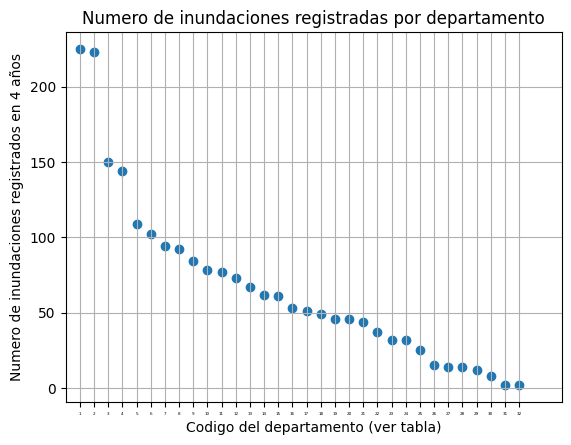

In [ ]:
plt.xlim(0,35)
plt.grid()
plt.xlabel("Codigo del departamento (ver tabla)")
plt.ylabel("Numero de inundaciones registrados en 4 años")
plt.scatter(puntosX,puntosY, marker="o")
plt.xticks(puntosX)
plt.tick_params(axis='x', which='both', labelsize=3)
plt.title("Numero de inundaciones registradas por departamento")
plt.show()


In [ ]:
#Tabla de departamentos 
dictDatos={"Codigo":puntosX, "Departamento":nombresX, "Numero de inundaciones": puntosY}
datasetDepartamentos=pd.DataFrame(dictDatos)

datasetDepartamentos.head(32)

datasetDepartamentos.to_csv("inundaciones_por_departamento_2018_a_2021", index=False)

In [ ]:
#Estadisticas acerca del numerod e incidentes en los departamentos
datasetDepartamentos.describe()
inundacionesReportadas=datasetDepartamentos["Numero de inundaciones"].sum()
print(inundacionesReportadas)

2123


In [ ]:
#numero total de fallecidos reportados
fallecidos=datasetTotal["FALLECIDOS"].sum()
print("El numero aproximado de fallecidos reportados fue de: ",fallecidos)
heridos=datasetTotal["HERIDOS"].sum()
print("El numero aproximado de heridos reportados fue: ",heridos)
desaparecidos=datasetTotal["DESAPARECIDOS"].sum()
print("El numero aproximado de desaparecidos reportados fue: ",desaparecidos)
afectados=datasetTotal["AFECTADOS"].sum()
print("El numero aproximado de afectados reportados fue: ",afectados)

El numero aproximado de fallecidos reportados fue de:  40
El numero aproximado de heridos reportados fue:  73
El numero aproximado de desaparecidos reportados fue:  11
El numero aproximado de afectados reportados fue:  1430560
